In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [3]:
dataHP['Alley'].isnull().mean()

0.9376712328767123

### Extraemos Columnas con NAN

In [4]:
cols_con_na= [col for col in dataHP.columns if (dataHP[col].isnull().mean()>0)]
cols_con_na


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [6]:
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [7]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean() <=0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

### Complete Case Analysis (CCA)

In [8]:
#Dejamos solo las columnas que tiene casos completos, es decir no tienen ningún nulo
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 81), (1412, 70))

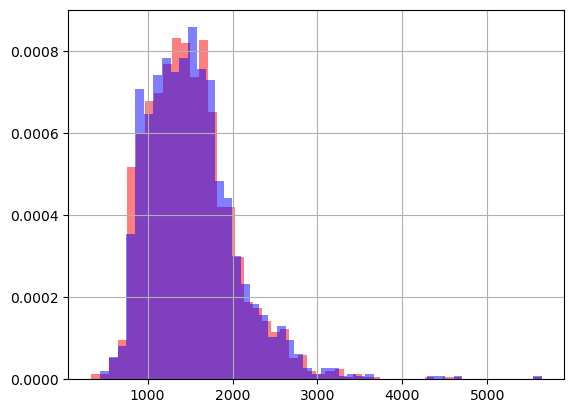

In [9]:
dataHP['GrLivArea'].hist(bins=50, density=True, color='red', alpha=0.5)
data_HP_noNAN['GrLivArea'].hist(bins=50, density=True, color='blue', alpha=0.5)
plt.show()

### Imputación de Media y Mediana

In [10]:
dataTitanic = pd.read_csv('titanic.csv')
dataTitanic = dataTitanic[['Survived', 'Age','Fare' ]]
dataTitanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
dataTitanic.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
media = dataTitanic['Age'].mean()
mediana = dataTitanic['Age'].median()

print(f"Media: {media}")
print(f"Median: {mediana}")

Media: 29.69911764705882
Median: 28.0


In [13]:
dataTitanic['Age_Mean']= np.round(dataTitanic['Age'].fillna(media),0)
dataTitanic['Age_Median']= np.round(dataTitanic['Age'].fillna(mediana),0)

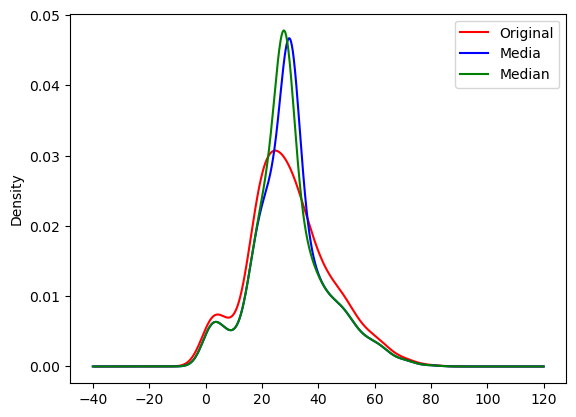

In [14]:
fig = plt.figure()
ax=fig.add_subplot(111)

dataTitanic['Age'].plot.density(color='red', label='Original')
dataTitanic['Age_Mean'].plot.density(color='blue', label='Media')
dataTitanic['Age_Median'].plot.density(color='green', label='Median')
ax.legend()

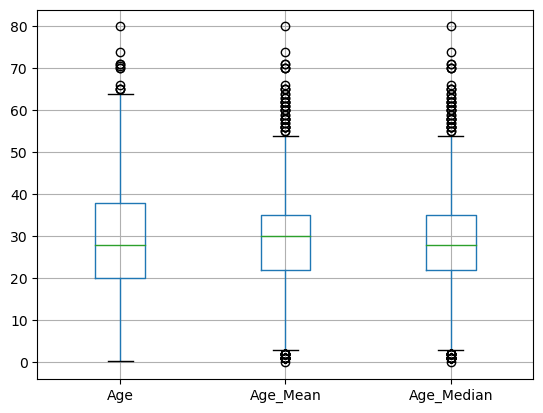

In [15]:

dataTitanic[['Age', 'Age_Mean', 'Age_Median']].boxplot()
plt.show()

#### Clase 2

### Imputación Categorica

In [16]:
dataset_cat_missing = dataHP[['BsmtQual','FireplaceQu', 'SalePrice']]
dataset_cat_missing.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [17]:
dataset_cat_missing.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [18]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

<Axes: >

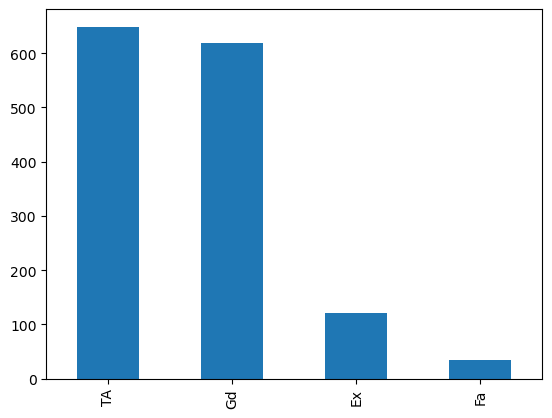

In [19]:
dataset_cat_missing['BsmtQual'].value_counts().plot.bar()

In [20]:
import seaborn as sns

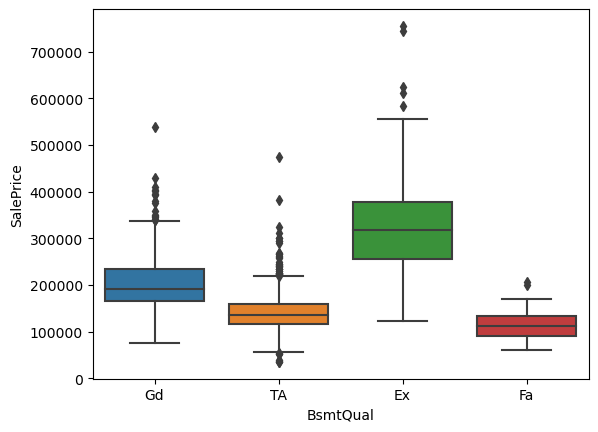

In [21]:
sns.boxplot(x=dataset_cat_missing['BsmtQual'], y = dataset_cat_missing['SalePrice'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

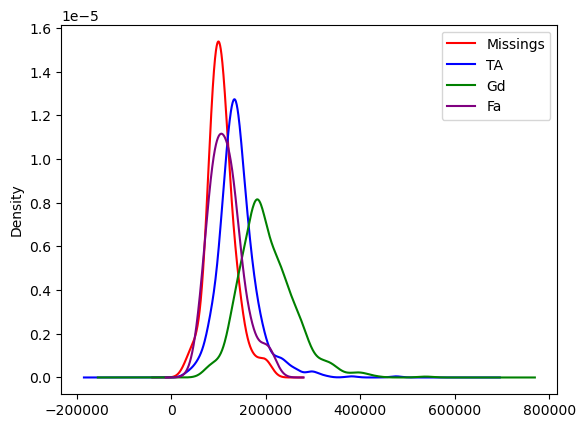

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual']== 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual']== 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtQual']== 'Fa']['SalePrice'].plot(kind="kde", color="purple", label="Fa")
ax.legend()
plt.show

In [23]:
dataset_cat_missing['BsmtQual'].fillna('Fa',inplace= True)#imputación de variable categorica

C:\Users\haroldo.marroquin\AppData\Local\Temp\ipykernel_20788\749333422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['BsmtQual'].fillna('Fa',inplace= True)#imputación de variable categorica


In [24]:
dataset_cat_missing['FireplaceQu'].value_counts()/len(dataset_cat_missing)

Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64

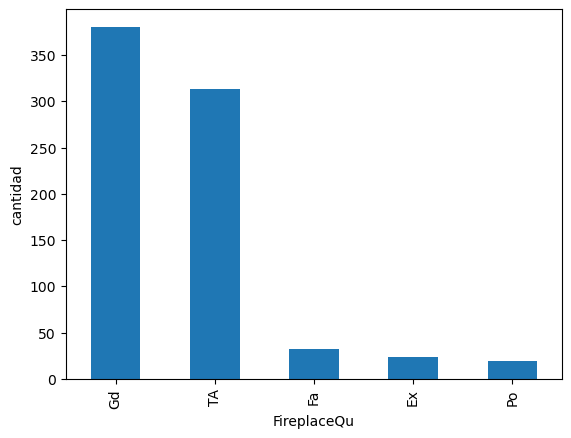

In [25]:
dataset_cat_missing['FireplaceQu'].value_counts().plot.bar()
plt.ylabel("cantidad")
plt.xlabel("FireplaceQu")
plt.show()

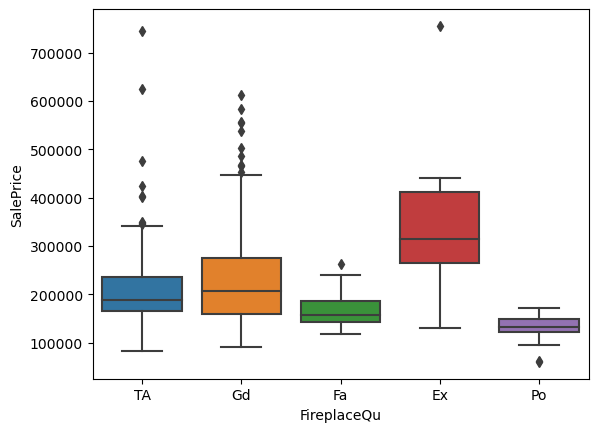

In [26]:
sns.boxplot(x=dataset_cat_missing['FireplaceQu'], y = dataset_cat_missing['SalePrice'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

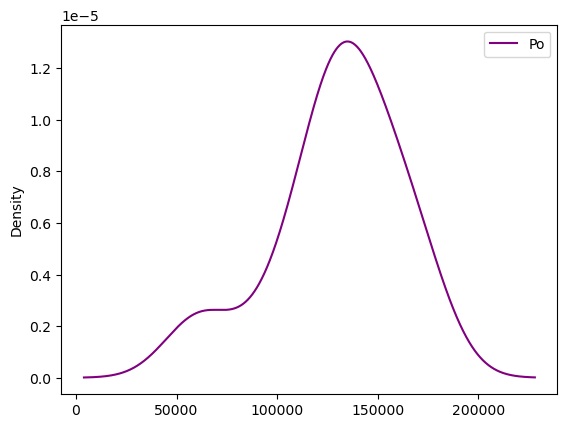

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)

#dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']== 'Po']['SalePrice'].plot(kind="kde", color="purple", label="Po")
ax.legend()
plt.show

In [28]:
dataset_cat_missing['FireplaceQu'].fillna('Po',inplace=True) #imputación de variable categorica

C:\Users\haroldo.marroquin\AppData\Local\Temp\ipykernel_20788\2389739503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['FireplaceQu'].fillna('Po',inplace=True) #imputación de variable categorica


### Codificación de variables Categóricas

In [29]:
def getCategoryVars(dataset):
     cat_colnames =[]
     colnames = dataset.columns
     for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
     return cat_colnames

In [30]:
cat_cols = getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [31]:
cat_cols.append('SalePrice')

In [32]:
dataset_categories = dataHP[cat_cols]
dataset_categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [33]:
dataset_categories['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [34]:
pd.get_dummies(dataset_categories['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [35]:
dataset_categories.info

<bound method DataFrame.info of      MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl

In [36]:
dfTemp = pd.get_dummies(dataset_categories)
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 253 entries, SalePrice to SaleCondition_Partial
dtypes: int64(1), uint8(252)
memory usage: 370.8 KB


In [37]:
##Frecuency Encoding

dataset_categories['KitchenQual'].value_counts().sort_values(ascending = False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

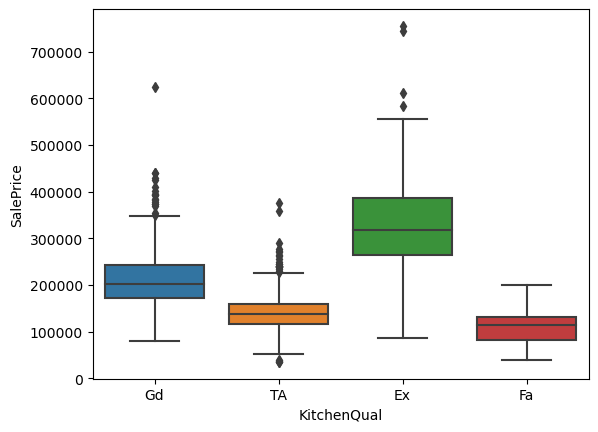

In [38]:
sns.boxplot(x=dataset_categories['KitchenQual'], y=dataset_categories['SalePrice'])
plt.show

In [39]:
kitchenQual_freq_mapper = (dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
kitchenQual_freq_mapper

{'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39}

In [40]:
dataset_categories['KitchenQual_code'] = dataset_categories['KitchenQual'].map(kitchenQual_freq_mapper)
dataset_categories[['KitchenQual', 'KitchenQual_code']]

C:\Users\haroldo.marroquin\AppData\Local\Temp\ipykernel_20788\2788374200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['KitchenQual_code'] = dataset_categories['KitchenQual'].map(kitchenQual_freq_mapper)


,KitchenQual,KitchenQual_code
0,Gd,586
1,TA,735
2,Gd,586
3,Gd,586
4,Gd,586
...,...,...
1455,TA,735
1456,TA,735
1457,Gd,586
1458,Gd,586


### Clase 3

### Outliers

In [41]:
def getColumnTypes(dataset):
     ''' Descripcion: Esta función extrae el tipo de dominio de las columnas de un dataset.
         Entradas: Pandas Dataframe  
         Salida: Tupla con arreglo que contine nombres de las columnas. '''
     
     continuas = []
     discretas = []
     categoricas = []
     for col in dataset.columns:
          if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
               if(len(dataset[col].unique()) > 30): #criterio para discretas o continuas
                    continuas.append(col)
               else:
                    discretas.append(col)
          else:
               categoricas.append(col)

     return continuas, discretas, categoricas

In [42]:
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gar

In [43]:
import scipy.stats as stats

In [44]:
def plotDistBoxQQ(dataset, col):
     '''
     Descripcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers 
     Input: dataset-> pandas dataframe, col->string con nombre de columna
     output: visualiuzación de plots.
     '''
     plt.figure(figsize=(20, 6))
     plt.subplot(1, 3, 1)
     sns.distplot(dataset[col], bins=30)
     plt.title("Histograma y Densisdad")

     plt.subplot(1, 3, 2)
     sns.boxplot(y=dataset[col])
     plt.title("Boxplot")

     plt.subplot(1, 3, 3)
     stats.probplot(dataset[col], dist="norm", plot=plt)
     plt.title("Q-Q Plot")

C:\Users\haroldo.marroquin\AppData\Local\Temp\ipykernel_20788\1034625061.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\haroldo.marroquin\AppData\Local\Temp\ipykernel_20788\1034625061.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


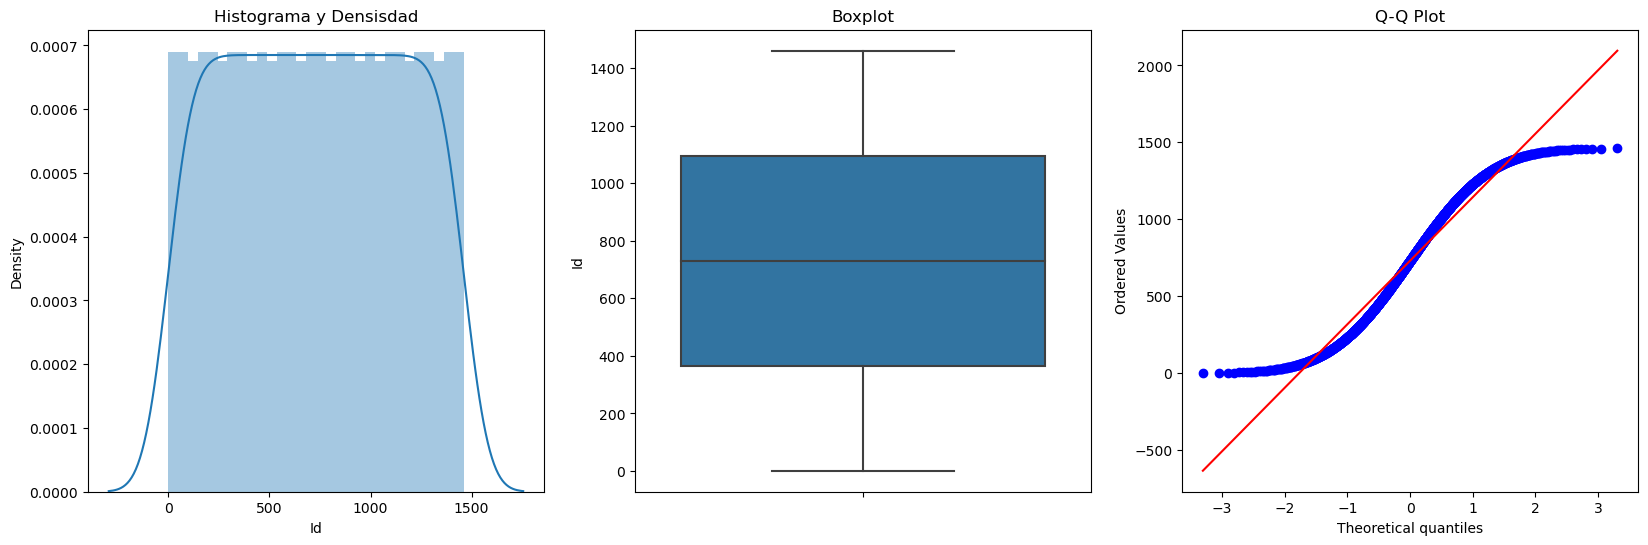

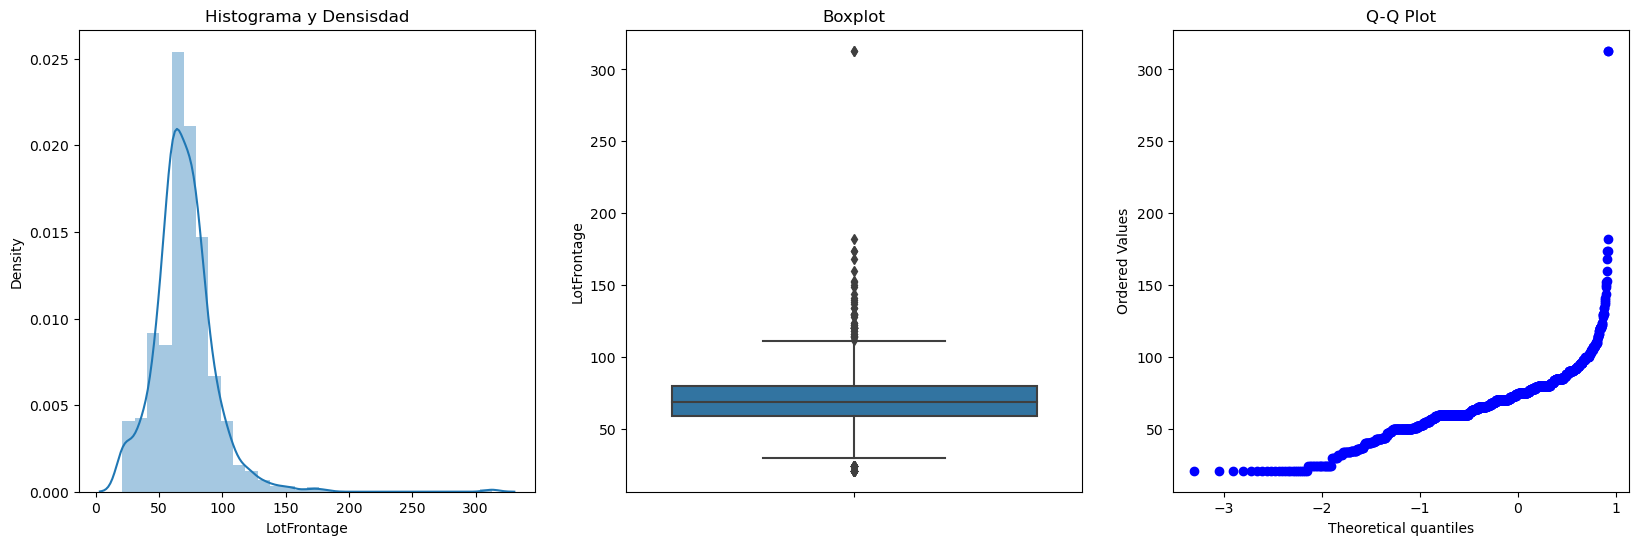

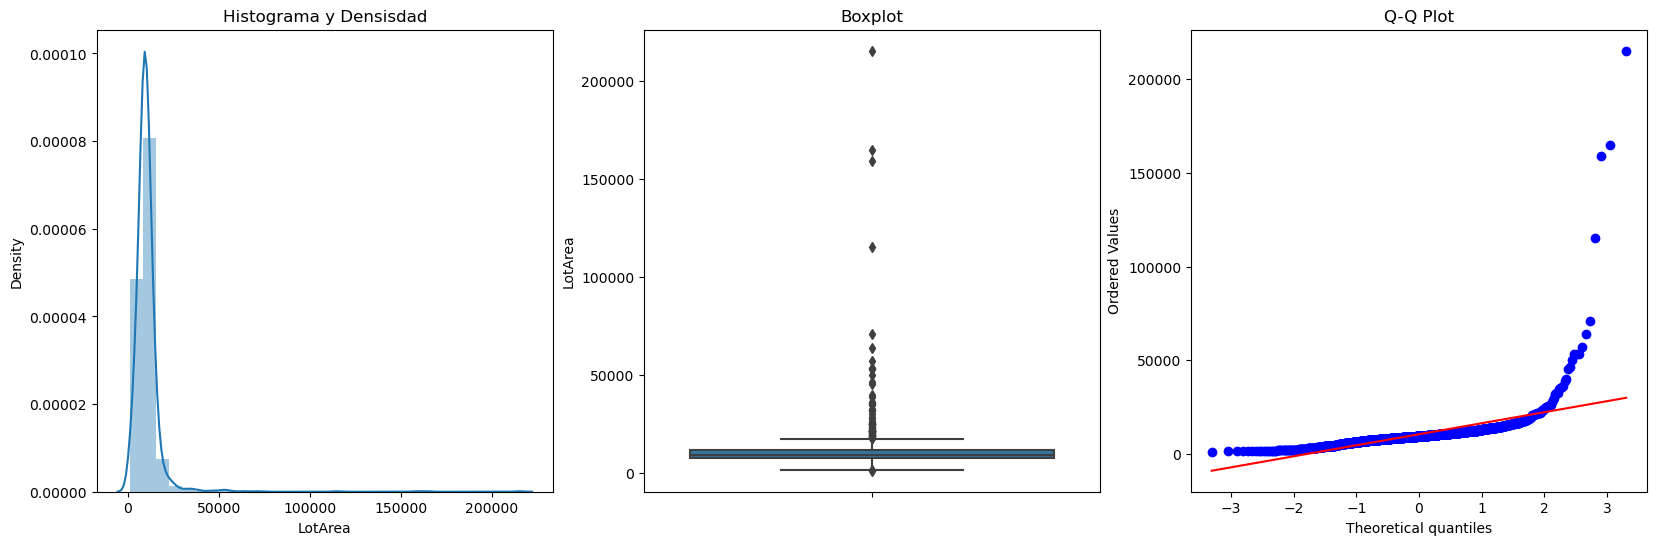

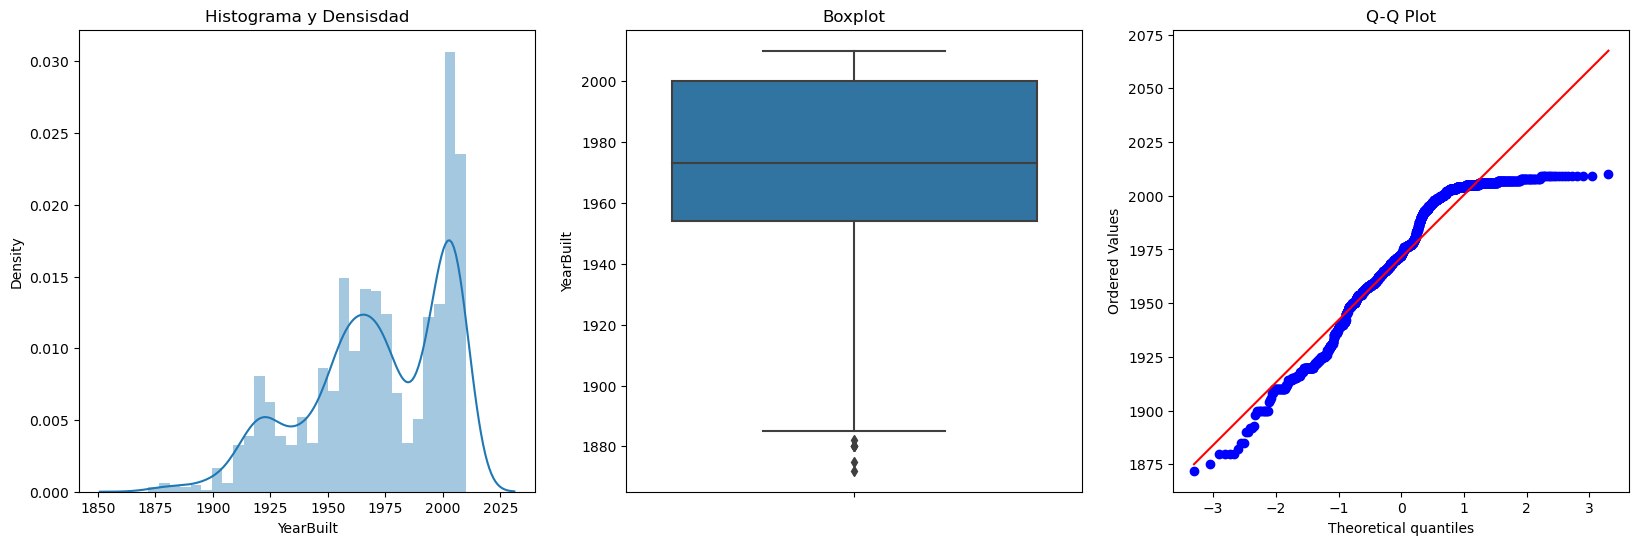

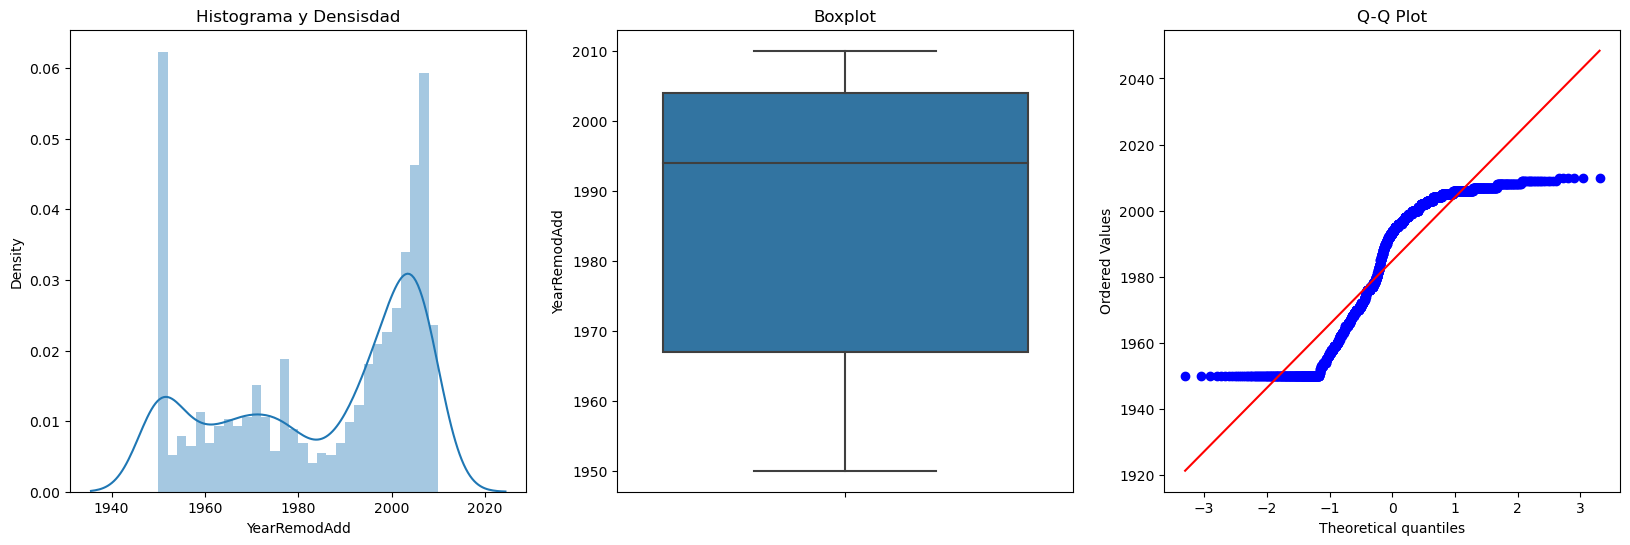

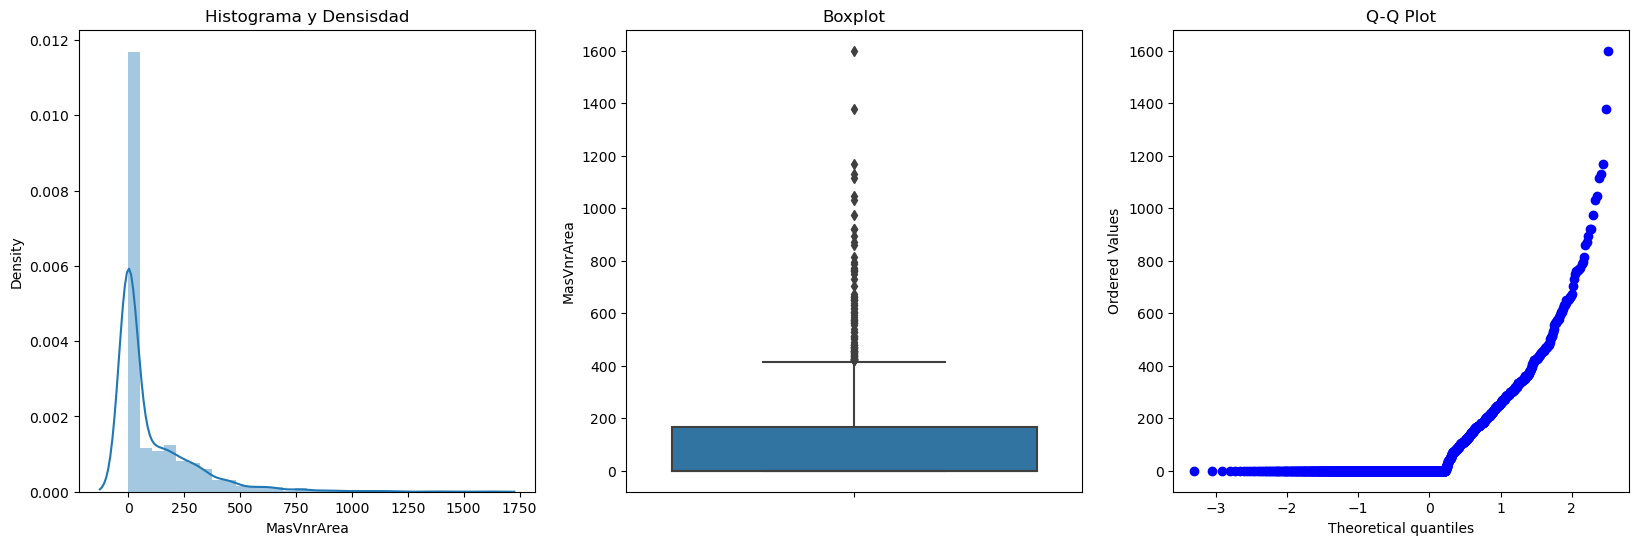

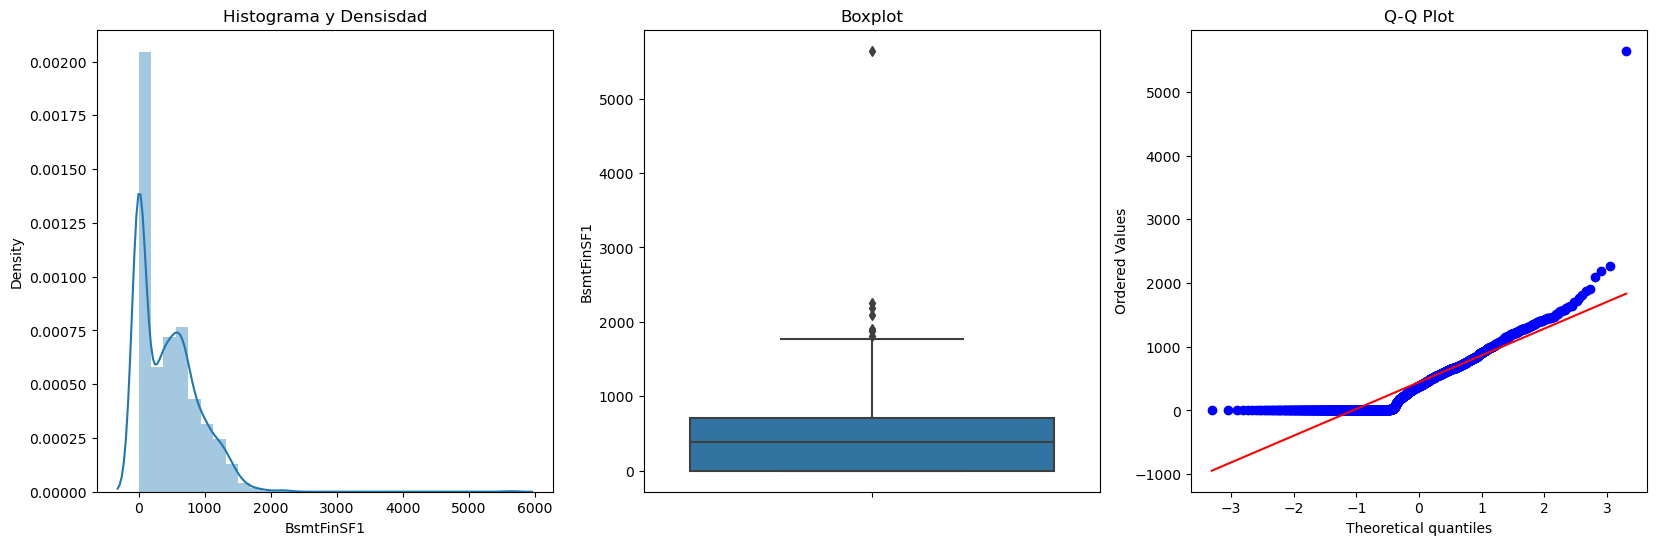

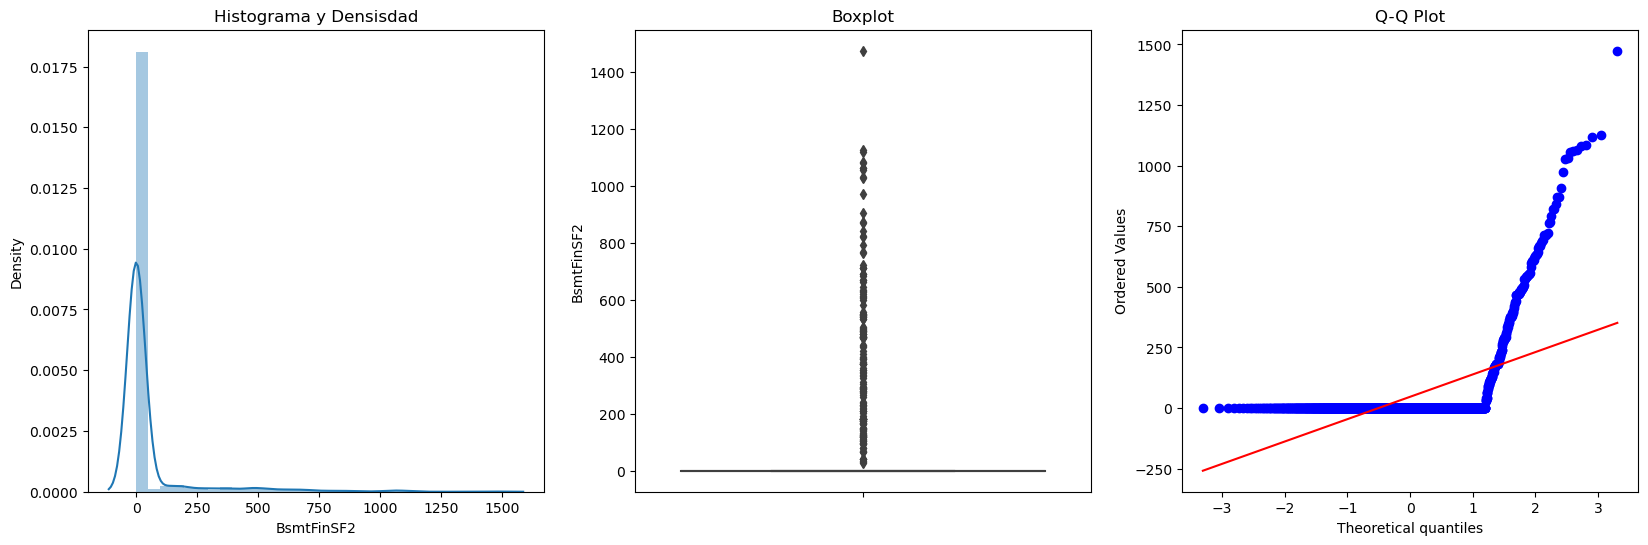

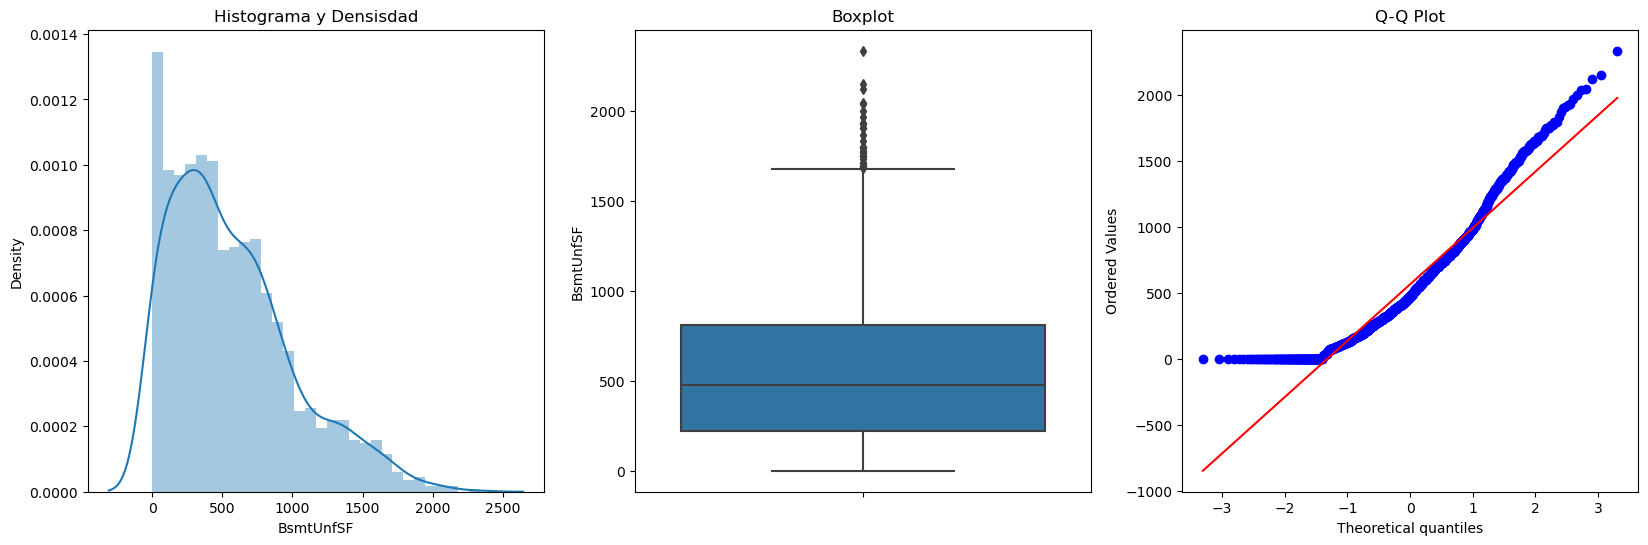

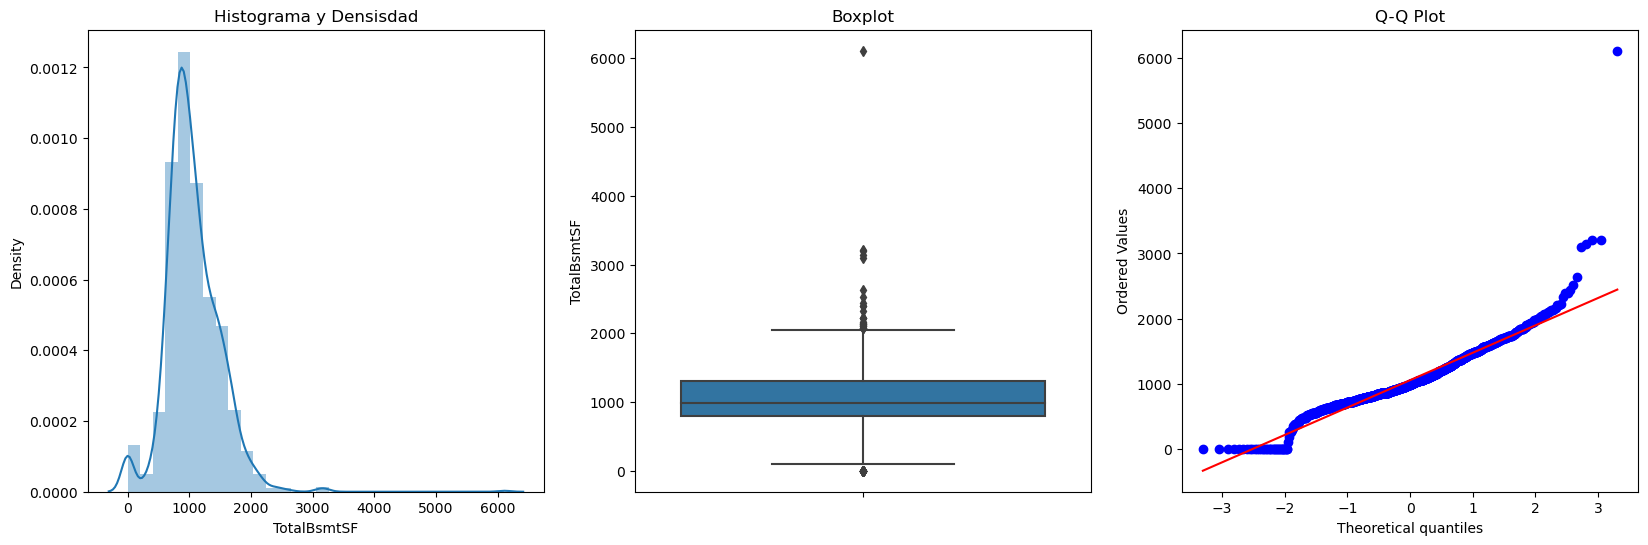

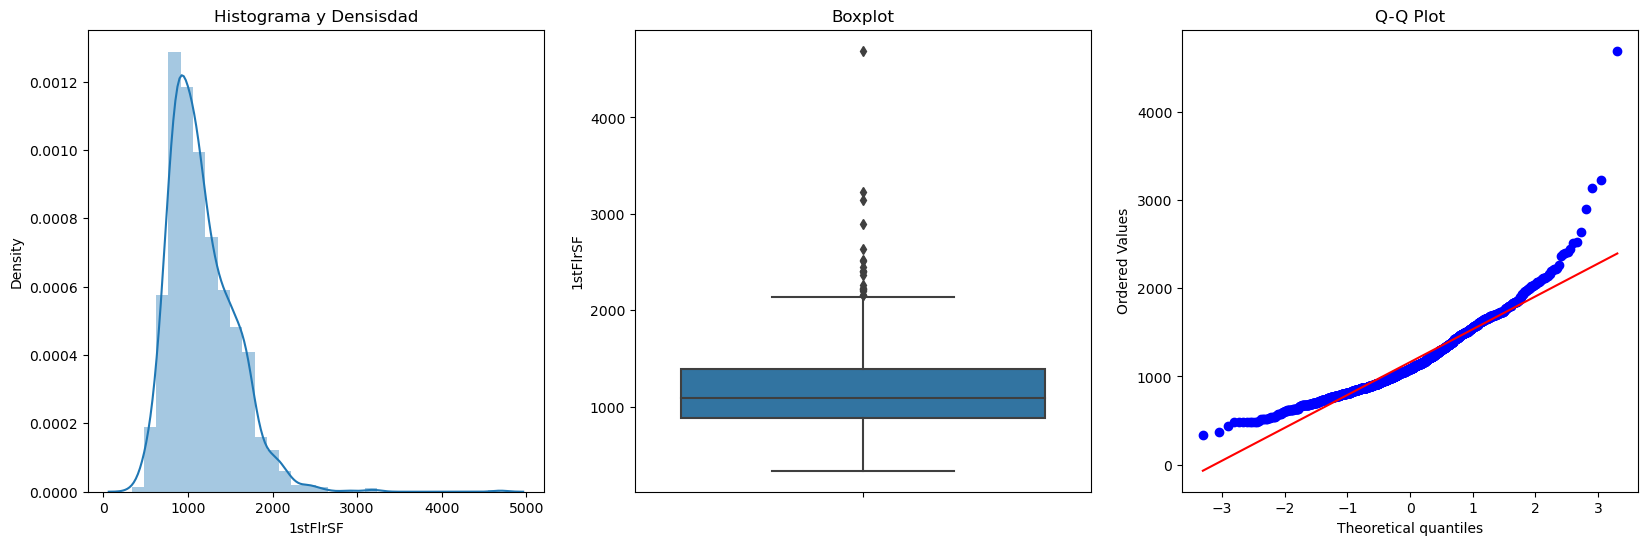

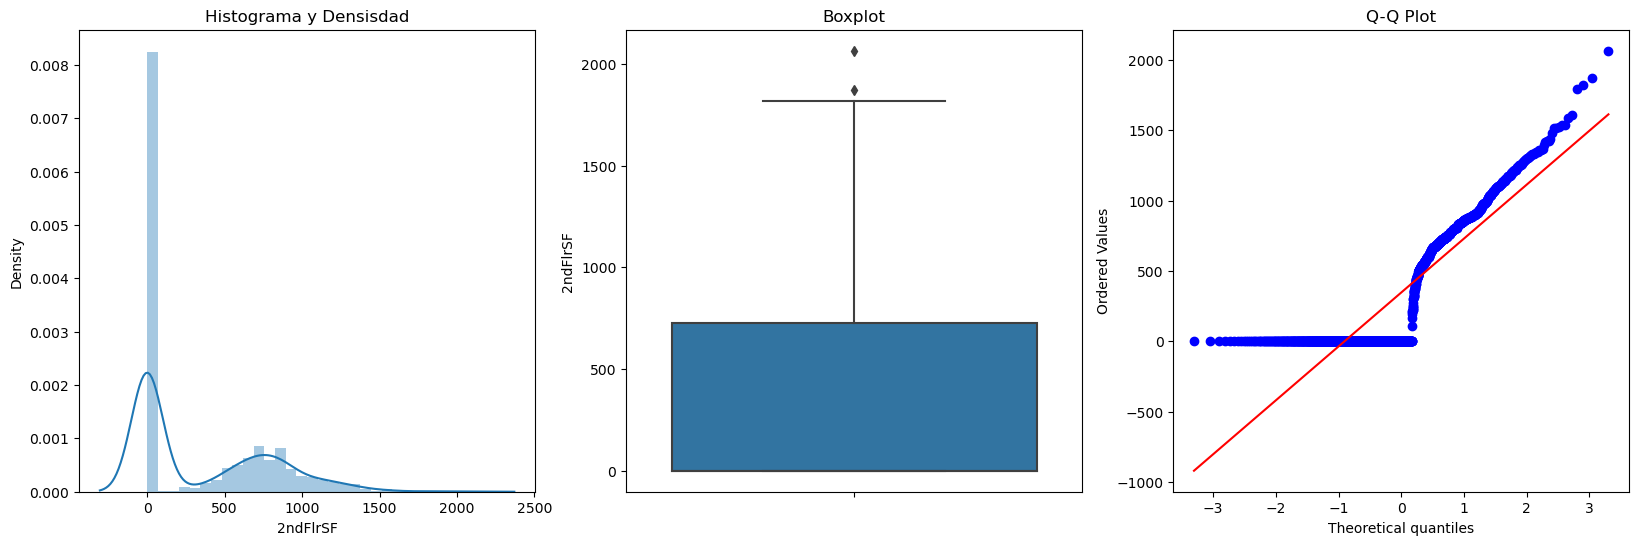

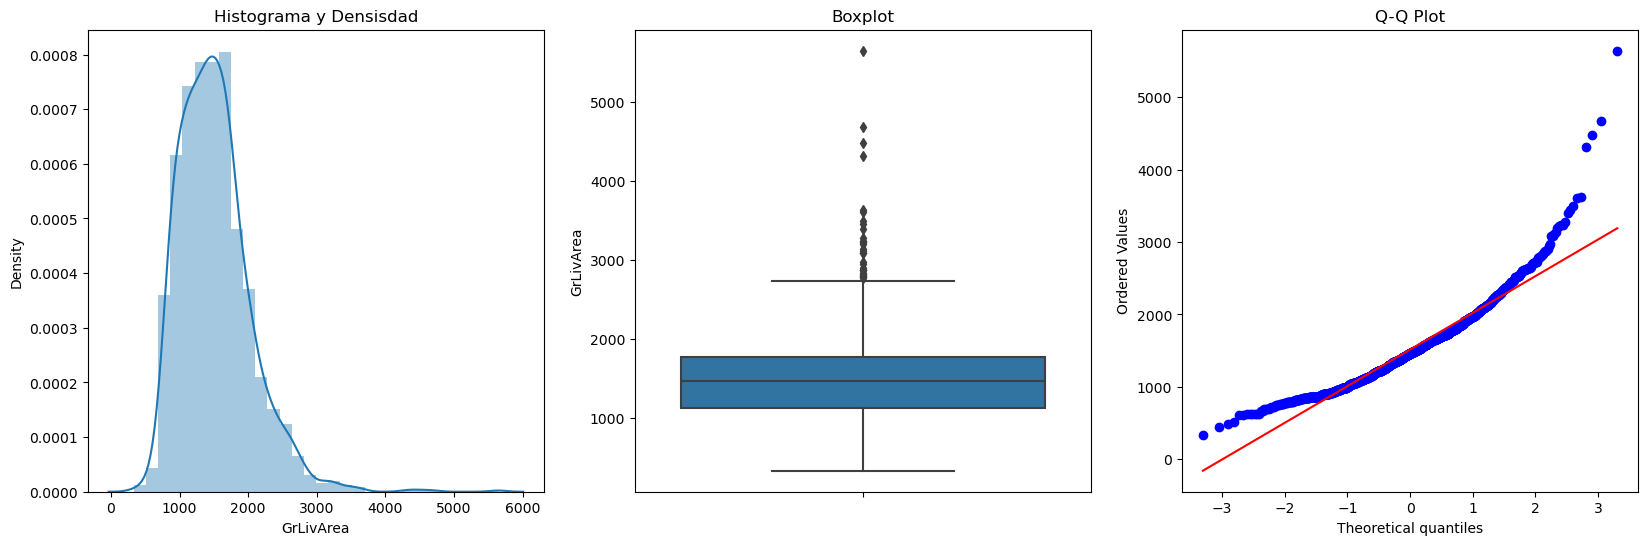

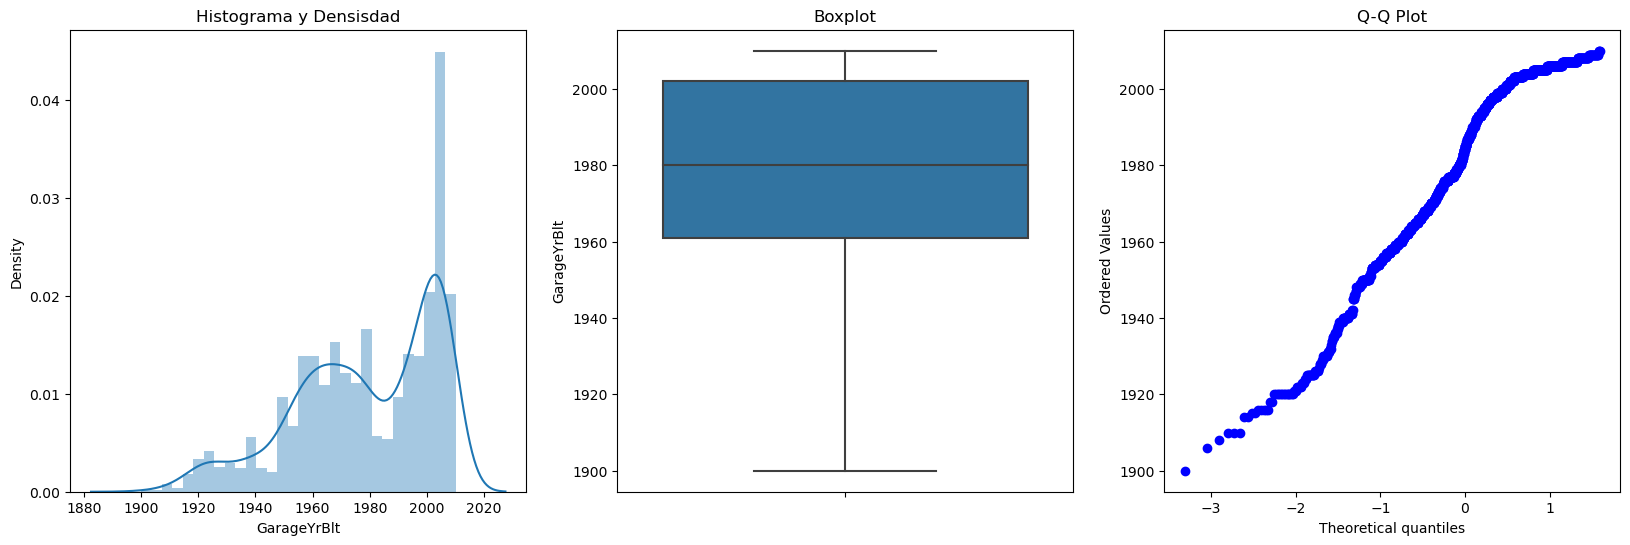

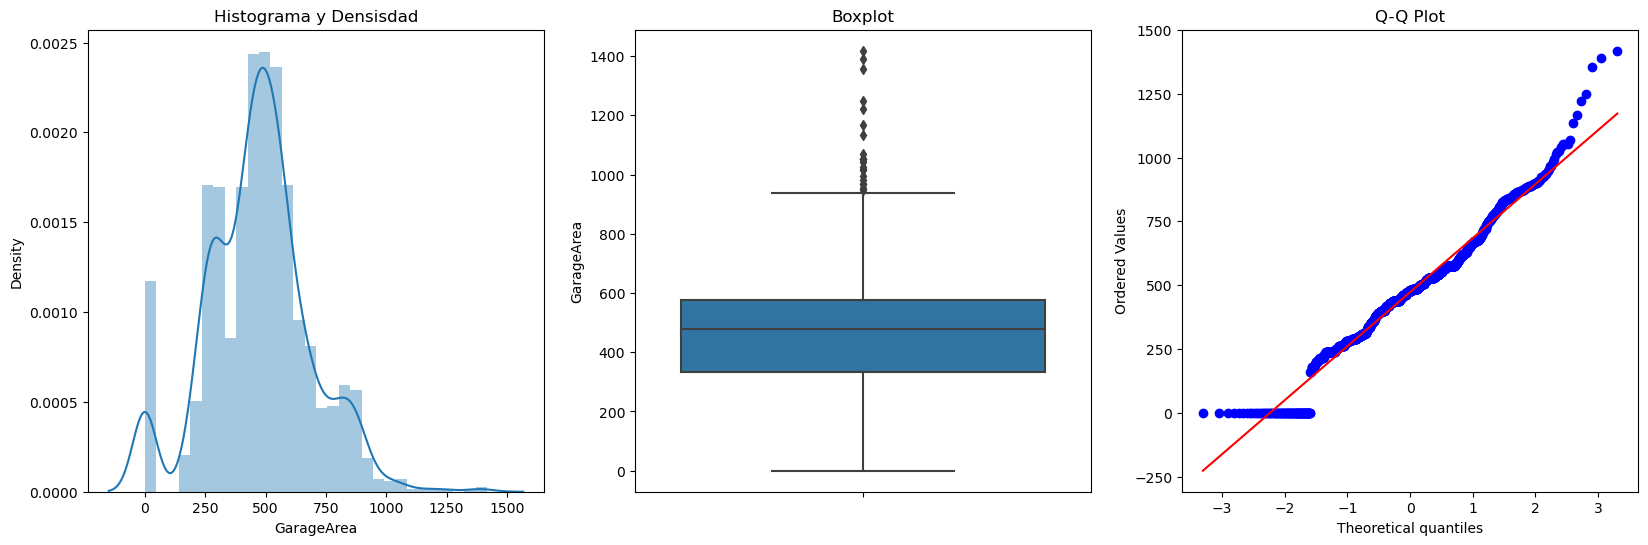

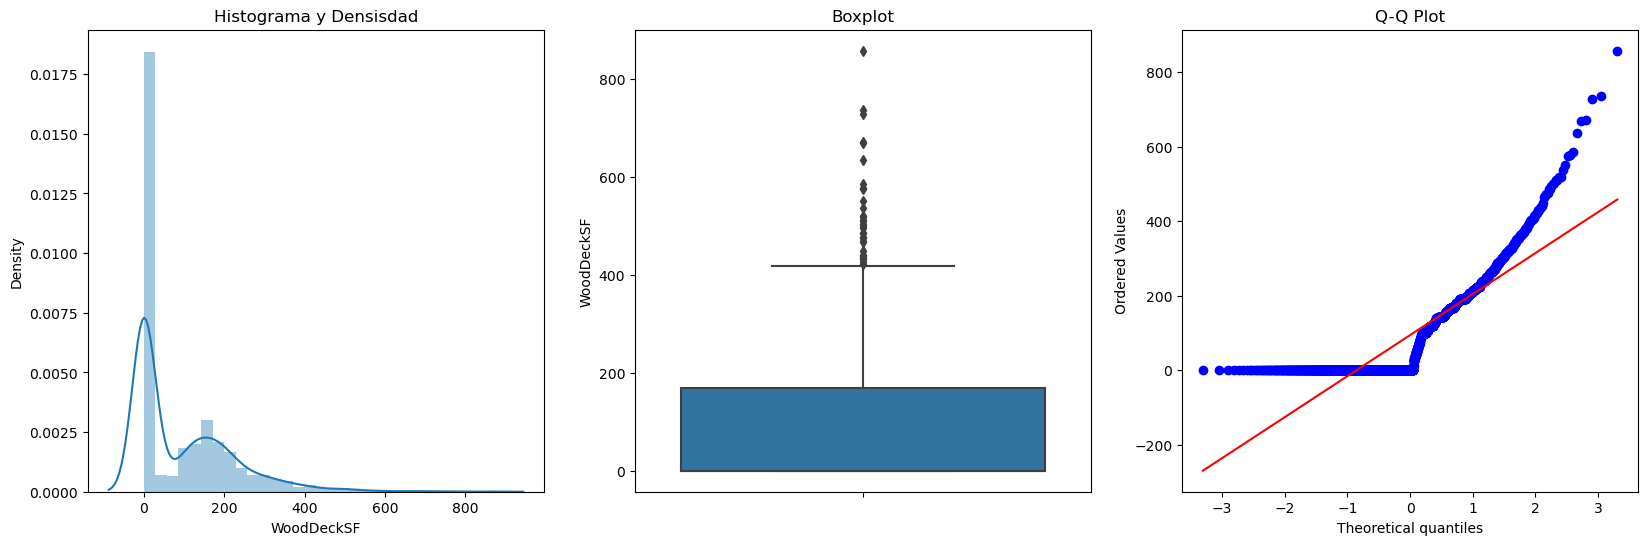

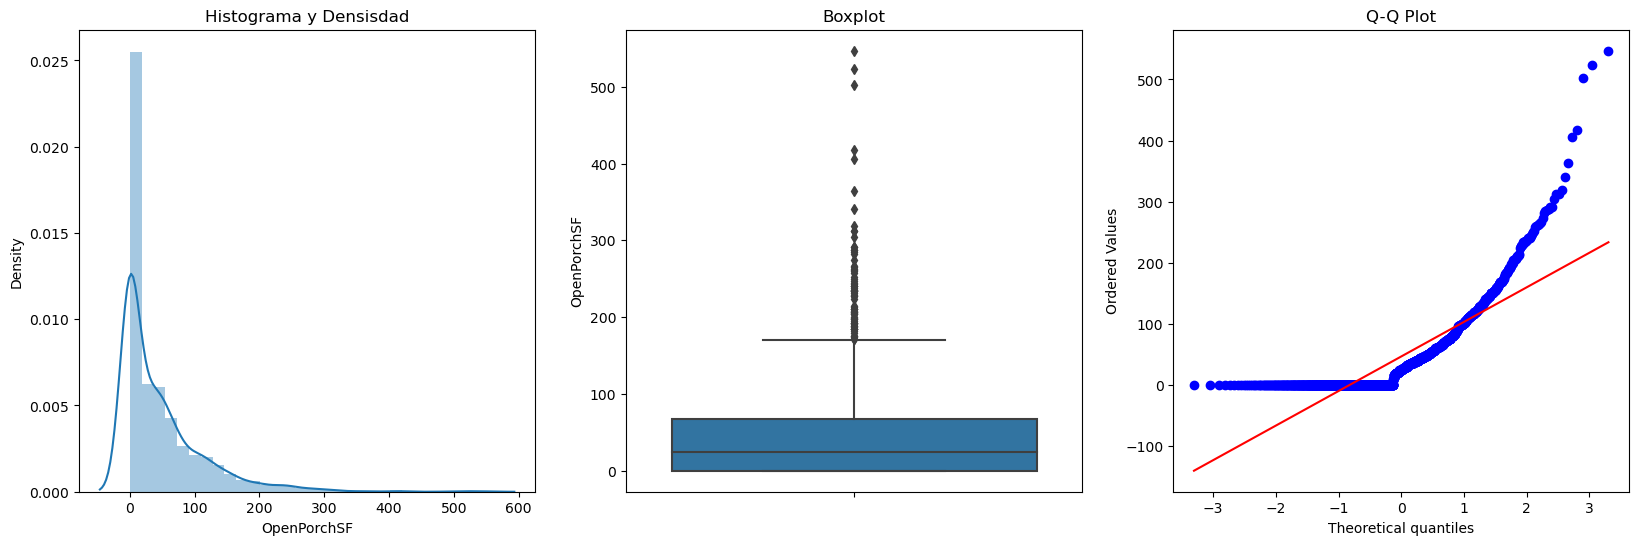

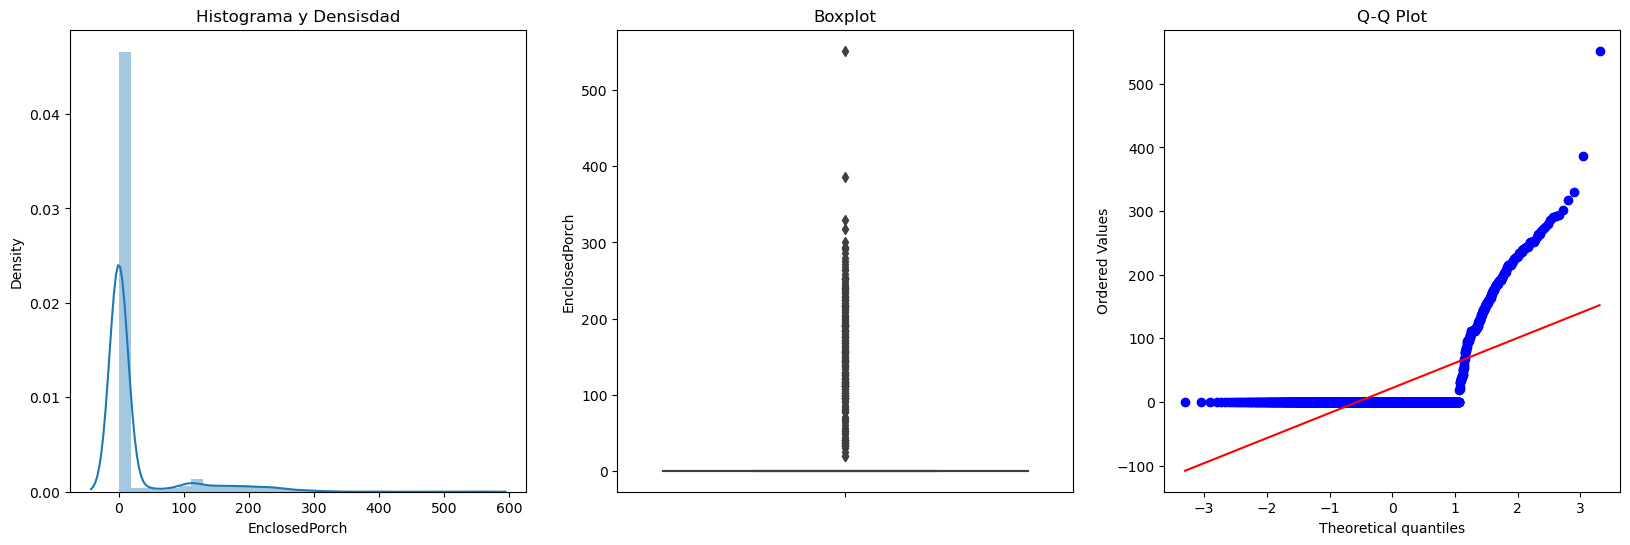

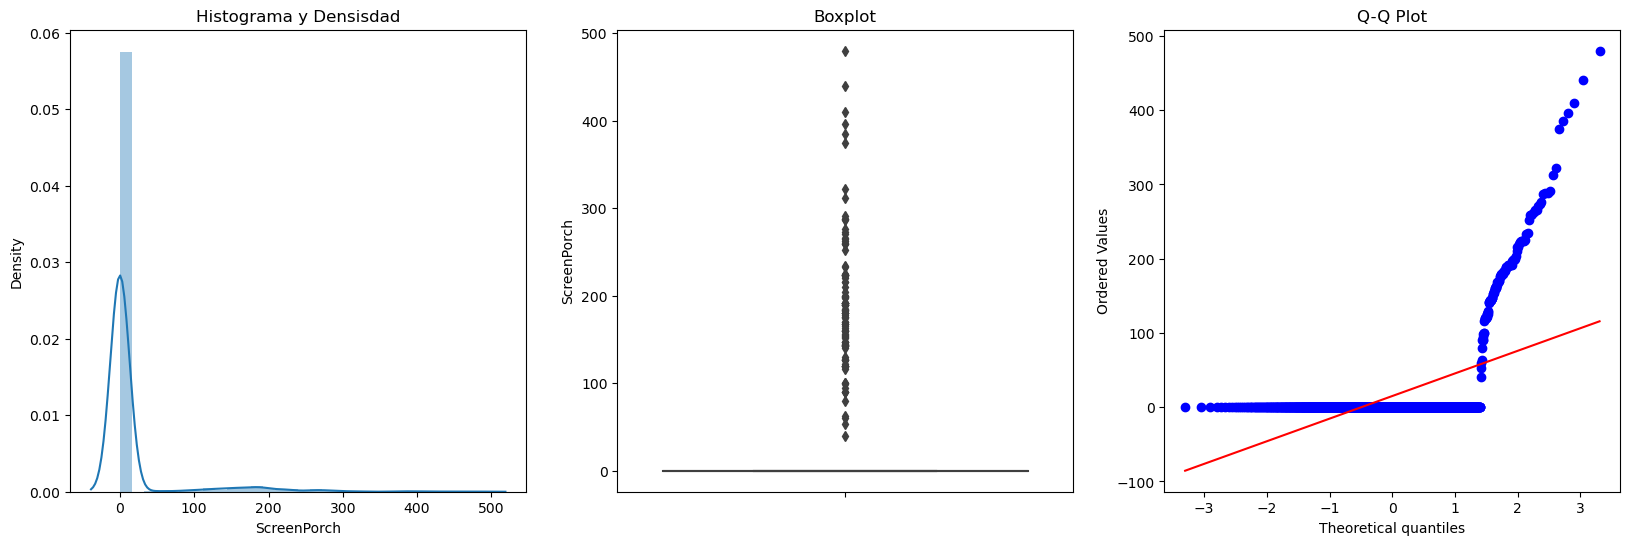

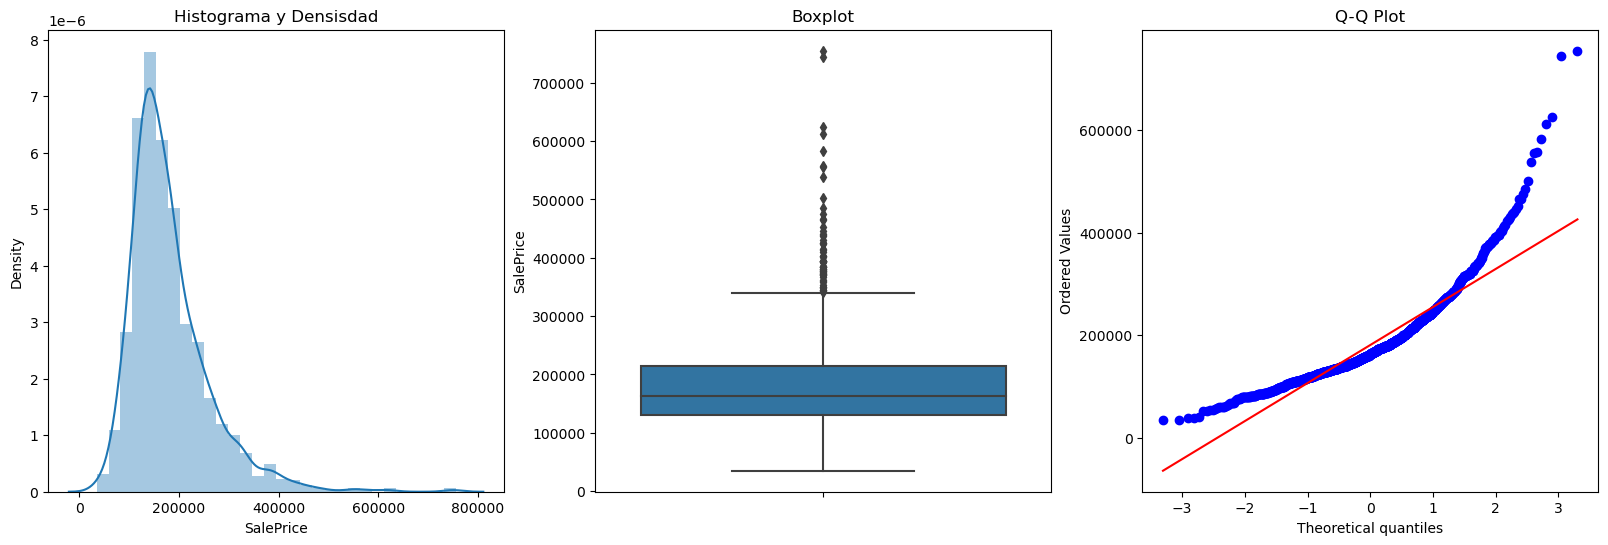

In [45]:
for col in continuas:
     plotDistBoxQQ(dataHP, col)

In [46]:
def detectOutliersLimits(dataset, col):
     '''
     Descripción: Calcula los limites superiores e inferiores para detección de outliers.
     Input: dataset-> pandas dataframe, col -> string nombre de columna
     Output: tupla de floats con los limites superior e inferior
     '''
     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)

     return LI, LS

In [47]:
LI, LS = detectOutliersLimits(dataHP, 'SalePrice')
LI, LS

(-17068.75, 361043.75)

##### Capping

C:\Users\haroldo.marroquin\AppData\Local\Temp\ipykernel_20788\1034625061.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


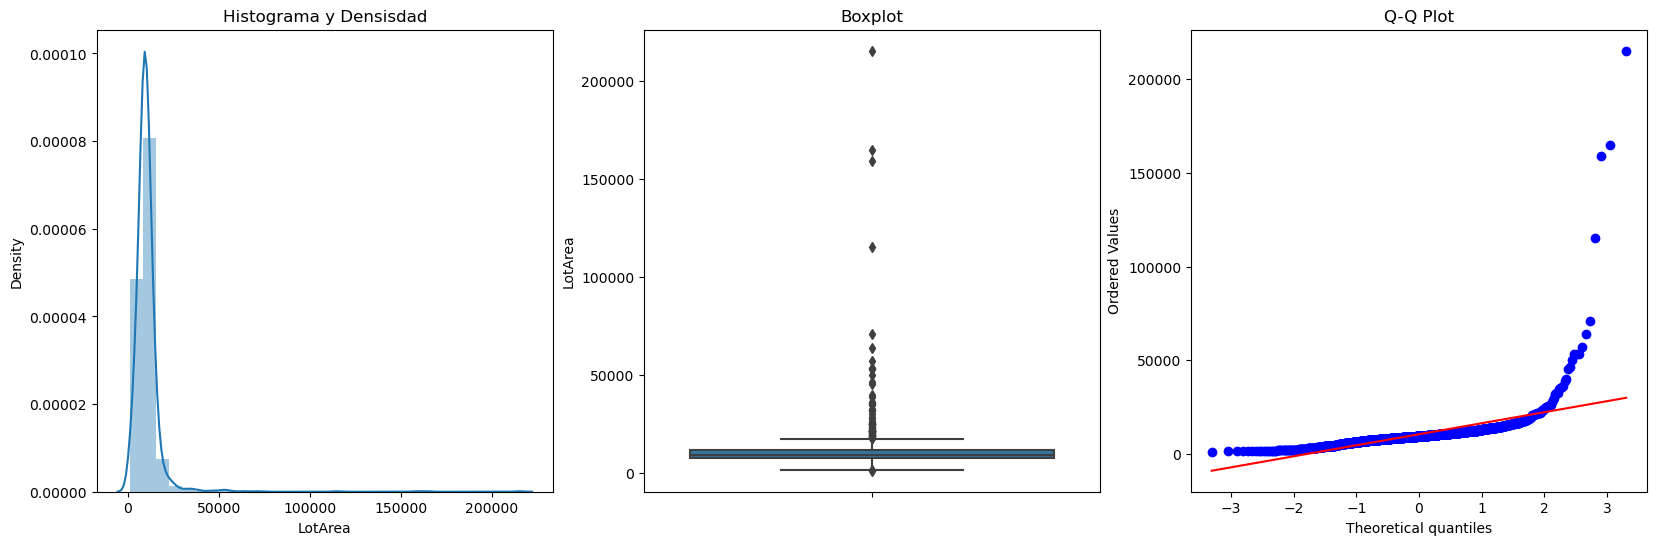

In [48]:
plotDistBoxQQ(dataHP, 'LotArea')

In [49]:
LI, LS = detectOutliersLimits(dataHP, 'LotArea')
dataHP['LotArea'] = np.where(dataHP['LotArea']  > LS, LS, 
                                                                       np.where(dataHP['LotArea']  < LI, LI, dataHP['LotArea'] ))

C:\Users\haroldo.marroquin\AppData\Local\Temp\ipykernel_20788\1034625061.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


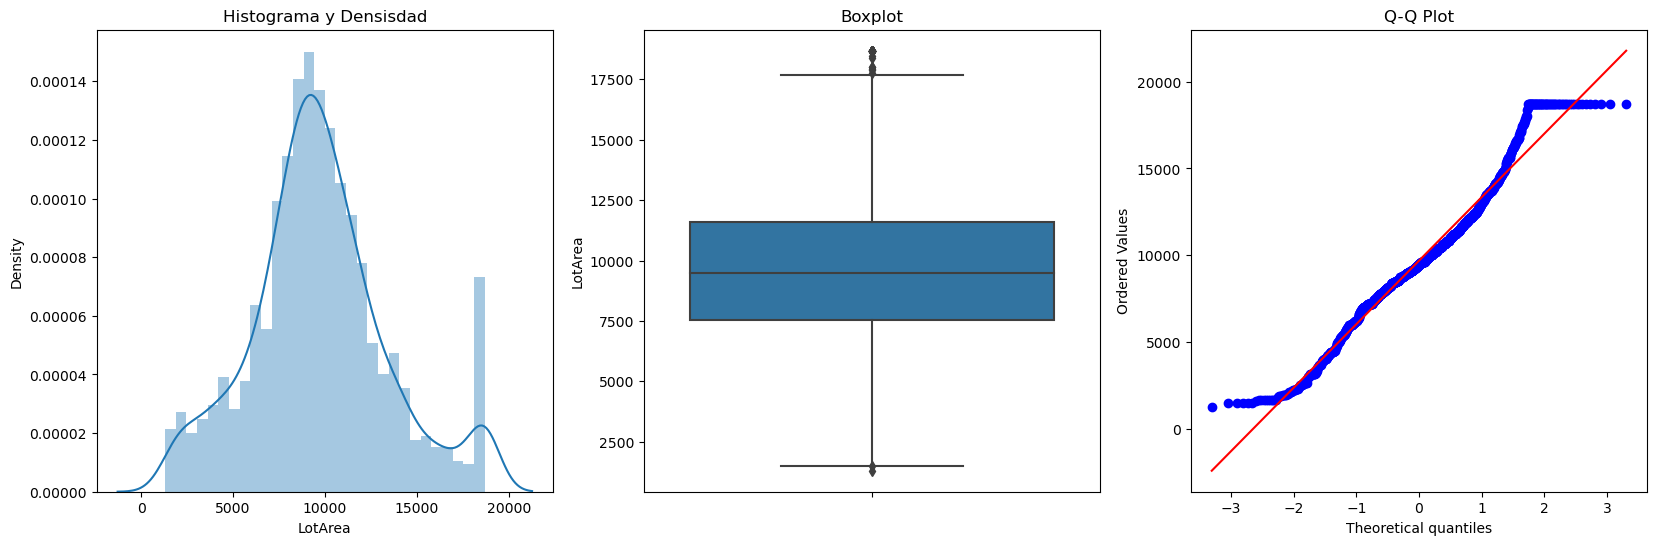

In [50]:
plotDistBoxQQ(dataHP, 'LotArea')

### 3.1 Variable Transformaction

In [51]:
x = np.array([20, 500000, 1500000, 2000000, 2500000])
y = np.log(x)

In [52]:
np.exp(y)

array([2.0e+01, 5.0e+05, 1.5e+06, 2.0e+06, 2.5e+06])

In [53]:
import scipy.stats as stats

In [54]:
dataHP = pd.read_csv('train_HP.csv')


In [55]:
def plot_density_qq(dataset, col):
     ''' Esta función muestra la gráfica de densisidad y el plot QQ para verificar normalidad. '''

     plt.figure(figsize=(15, 6))
     plt.subplot(1, 2, 1)
     dataset[col].hist(bins=30)
     plt.subplot(1, 2 ,2)
     stats.probplot(dataset[col], dist='norm', plot=plt)
     plt.show()

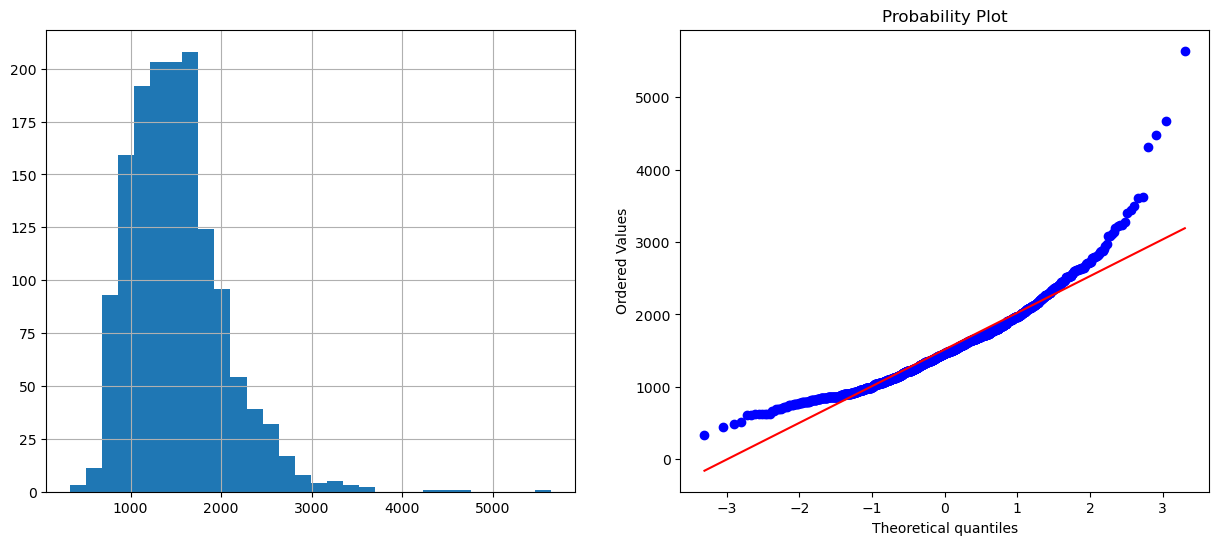

In [56]:
plot_density_qq(dataHP, 'GrLivArea')

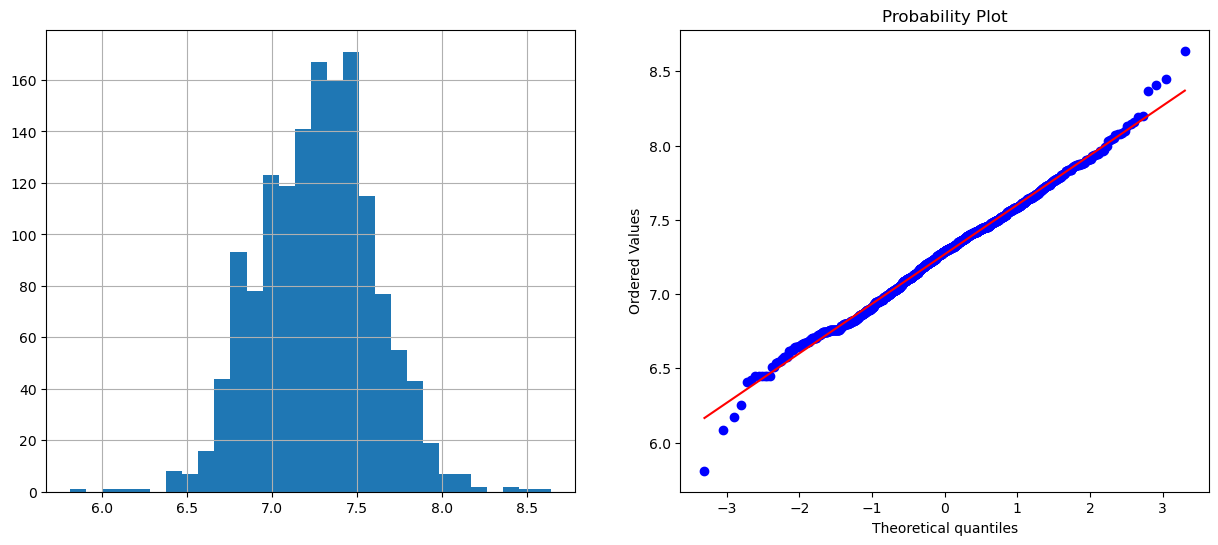

In [57]:
dataHP['GrLivArea_log'] = np.log(dataHP['GrLivArea'])
plot_density_qq(dataHP, 'GrLivArea_log')

In [58]:
for col in continuas:
     asimetria = round(dataHP[col].skew(), 4)
     kurtosis = round(dataHP[col].kurt(), 4)

     #validación de asimetría
     if((asimetria <= 0.1) and (asimetria >= -0.1)):
          etiqueta_asimetria = True
     else:
          etiqueta_asimetria = False

     #validación de curtosis
     if((kurtosis <= 3.2) and (kurtosis >= 2.8)):
          etiqueta_curtosis = True
     else:
          etiqueta_curtosis = False

     #conclusión de normalidad
     if(etiqueta_asimetria and etiqueta_curtosis):
          etiqueta = 'Normal'
     else:
          etiqueta = "No es Normal"
     print(f"{col} - Asimetría: {asimetria}, Curtosis: {kurtosis} - {etiqueta}") 

Id - Asimetría: 0.0, Curtosis: -1.2 - No es Normal
LotFrontage - Asimetría: 2.1636, Curtosis: 17.4529 - No es Normal
LotArea - Asimetría: 12.2077, Curtosis: 203.2433 - No es Normal
YearBuilt - Asimetría: -0.6135, Curtosis: -0.4396 - No es Normal
YearRemodAdd - Asimetría: -0.5036, Curtosis: -1.2722 - No es Normal
MasVnrArea - Asimetría: 2.6691, Curtosis: 10.0824 - No es Normal
BsmtFinSF1 - Asimetría: 1.6855, Curtosis: 11.1182 - No es Normal
BsmtFinSF2 - Asimetría: 4.2553, Curtosis: 20.1133 - No es Normal
BsmtUnfSF - Asimetría: 0.9203, Curtosis: 0.475 - No es Normal
TotalBsmtSF - Asimetría: 1.5243, Curtosis: 13.2505 - No es Normal
1stFlrSF - Asimetría: 1.3768, Curtosis: 5.7458 - No es Normal
2ndFlrSF - Asimetría: 0.813, Curtosis: -0.5535 - No es Normal
GrLivArea - Asimetría: 1.3666, Curtosis: 4.8951 - No es Normal
GarageYrBlt - Asimetría: -0.6494, Curtosis: -0.4183 - No es Normal
GarageArea - Asimetría: 0.18, Curtosis: 0.9171 - No es Normal
WoodDeckSF - Asimetría: 1.5414, Curtosis: 2.993

In [59]:
shapiro_test = stats.shapiro(dataHP['GrLivArea'])
if(shapiro_test[1] < 0.05):
     print("No es Nomrmal")
else:
     print("Es Normal")

No es Nomrmal


In [60]:
shapiro_test = stats.shapiro(dataHP['GrLivArea_log'])
if(shapiro_test[1] < 0.05):
     print("No es Nomrmal")
else:
     print("Es Normal")
shapiro_test

No es Nomrmal


ShapiroResult(statistic=0.9960911273956299, pvalue=0.000858238257933408)

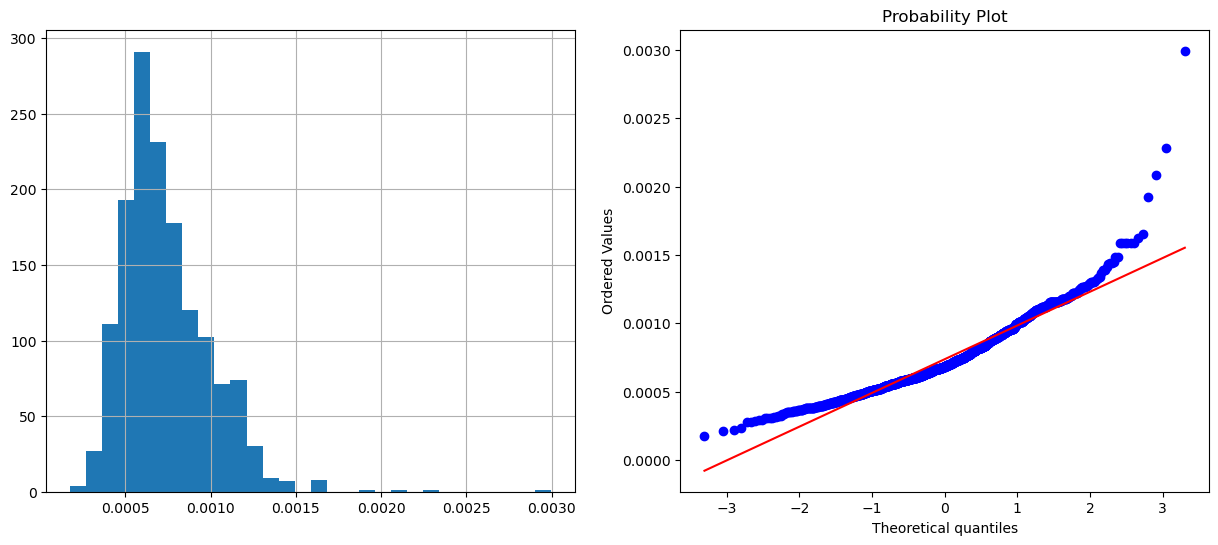

In [61]:
dataHP['GrLivArea_inv'] = (1 / dataHP['GrLivArea'])
plot_density_qq(dataHP, 'GrLivArea_inv')

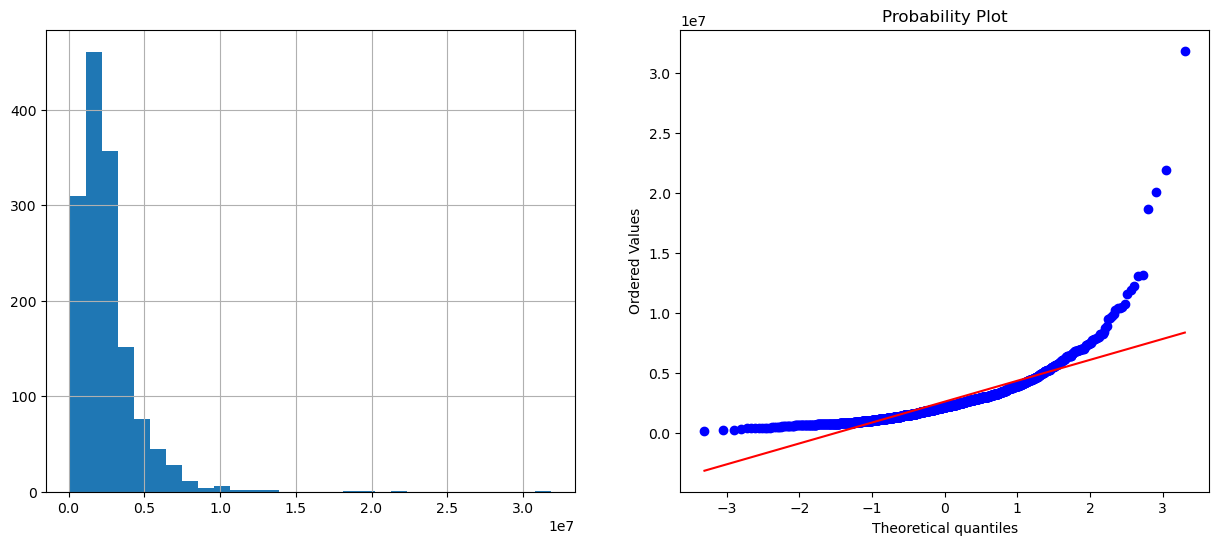

In [62]:
dataHP['GrLivArea_cuad'] = (dataHP['GrLivArea']**2)
plot_density_qq(dataHP, 'GrLivArea_cuad')

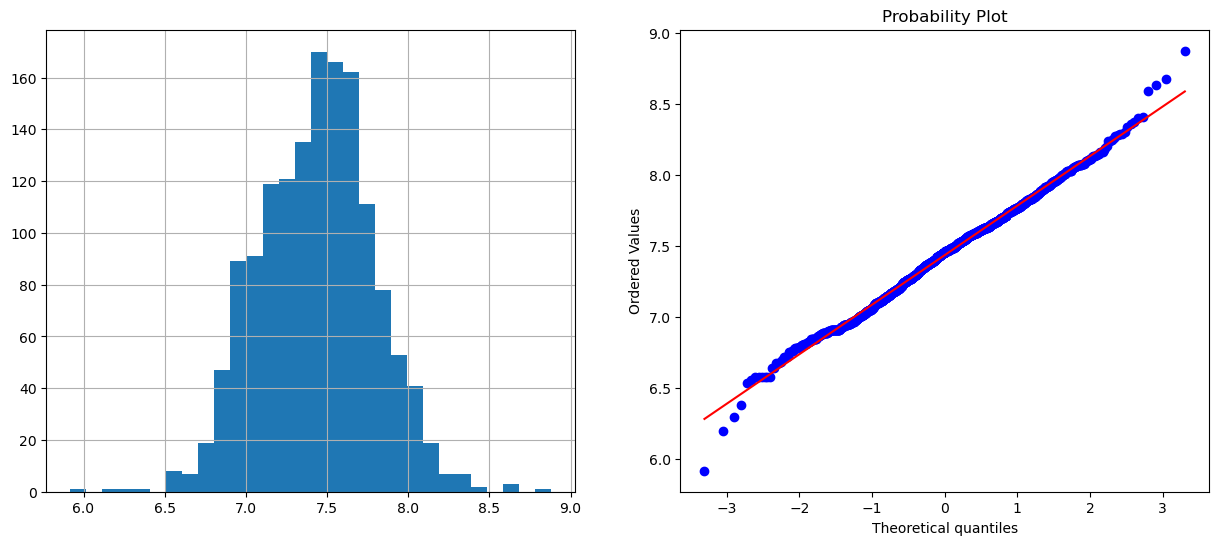

In [63]:
dataHP['GrLivArea_boxcox'], _ = stats.boxcox(dataHP['GrLivArea'])
plot_density_qq(dataHP, 'GrLivArea_boxcox')

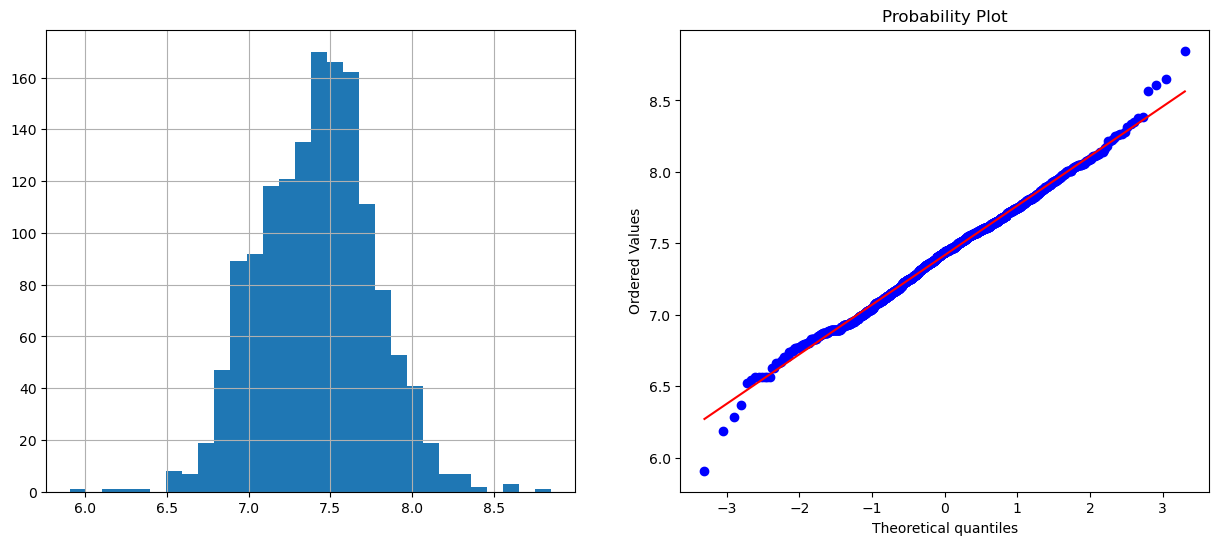

In [64]:
dataHP['GrLivArea_yeoJonhson'], _ = stats.yeojohnson(dataHP['GrLivArea'])
plot_density_qq(dataHP, 'GrLivArea_yeoJonhson')

#### 3.2 Feature Scaling

In [65]:
dataHP.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GrLivArea_log,GrLivArea_inv,GrLivArea_cuad,GrLivArea_boxcox,GrLivArea_yeoJonhson
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,2.758904,43.489041,6.321918,2007.815753,180921.195890,7.267774,0.000738,2.572571e+06,7.437229,7.417149
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,40.177307,496.123024,2.703626,1.328095,79442.502883,0.333550,0.000256,2.064173e+06,0.349189,0.346996
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2006.000000,34900.000000,5.811141,0.000177,1.115560e+05,5.918910,5.908775
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,2007.000000,129975.000000,7.029530,0.000563,1.275771e+06,7.187634,7.169113
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,6.000000,2008.000000,163000.000000,7.288928,0.000683,2.143296e+06,7.459009,7.438796
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,0.000000,0.000000,8.000000,2009.000000,214000.000000,7.482541,0.000885,3.156842e+06,7.661851,7.640370
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,738.000000,15500.000000,12.000000,2010.000000,755000.000000,8.637994,0.002994,3.183216e+07,8.877544,8.848186


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
dataHP_temp = dataHP.copy()[continuas]

In [68]:
scaler = StandardScaler()
scaler.fit(dataHP_temp) #calculamos información interna (parámetros) para transformaciones posteriores.

dataHP_scaled = scaler.transform(dataHP_temp)
dataHP_scaled = pd.DataFrame(dataHP_scaled, columns=dataHP_temp.columns)

In [69]:
round(dataHP_scaled.describe(), 2)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.00,1201.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.73,-2.02,-0.92,-3.29,-1.69,-0.57,-0.97,-0.29,-1.28,-2.41,-2.14,-0.80,-2.25,-3.18,-2.21,-0.75,-0.70,-0.36,-0.27,-1.84
25%,-0.87,-0.46,-0.30,-0.57,-0.87,-0.57,-0.97,-0.29,-0.78,-0.60,-0.73,-0.80,-0.73,-0.71,-0.65,-0.75,-0.70,-0.36,-0.27,-0.64
50%,0.00,-0.04,-0.10,0.06,0.44,-0.57,-0.13,-0.29,-0.20,-0.15,-0.20,-0.80,-0.10,0.06,0.03,-0.75,-0.33,-0.36,-0.27,-0.23
75%,0.87,0.41,0.11,0.95,0.93,0.34,0.59,-0.29,0.55,0.55,0.59,0.87,0.50,0.95,0.48,0.59,0.32,-0.36,-0.27,0.42
max,1.73,10.01,20.52,1.28,1.22,8.27,11.41,8.85,4.00,11.52,9.13,3.94,7.86,1.28,4.42,6.09,7.55,8.68,8.34,7.23


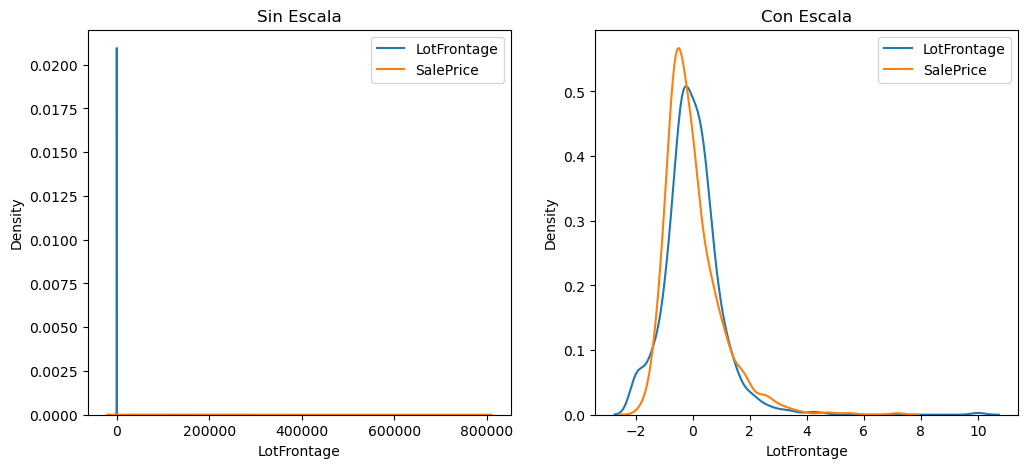

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Sin Escala")
sns.kdeplot(dataHP_temp['LotFrontage'], ax=ax1, label="LotFrontage")
sns.kdeplot(dataHP_temp['SalePrice'], ax=ax1, label="SalePrice")

ax2.set_title("Con Escala")
sns.kdeplot(dataHP_scaled['LotFrontage'], ax=ax2, label="LotFrontage")
sns.kdeplot(dataHP_scaled['SalePrice'], ax=ax2, label="SalePrice")

ax1.legend()
ax2.legend()

plt.show()

### Datos previo a la transformación de números negativos a nulos

In [79]:
dataHP_scaled

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,-1.730865,-0.208034,-0.207142,1.050994,0.878668,0.510015,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,0.370333,0.992426,0.351000,-0.752176,0.216503,-0.359325,-0.270208,0.347273
1,-1.728492,0.409895,-0.091886,0.156734,-0.429577,-0.572835,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.482512,-0.101543,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,0.007288
2,-1.726120,-0.084449,0.073480,0.984752,0.830215,0.322174,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,0.515013,0.911391,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,0.536154
3,-1.723747,-0.414011,-0.096897,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,0.383659,0.789839,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.515281
4,-1.721374,0.574676,0.375148,0.951632,0.733308,1.360826,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,1.299326,0.870874,1.698485,0.780197,0.563760,-0.359325,-0.270208,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,-0.331620,-0.260560,0.918511,0.733308,-0.572835,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,0.250402,0.830356,-0.060731,-0.752176,-0.100558,-0.359325,-0.270208,-0.074560
1456,1.723747,0.615871,0.266407,0.222975,0.151865,0.084610,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,1.061367,-0.020508,0.126420,2.033231,-0.704483,-0.359325,-0.270208,0.366161
1457,1.726120,-0.166839,-0.147810,-1.002492,1.024029,-0.572835,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,1.569647,-1.519651,-1.033914,-0.752176,0.201405,-0.359325,-0.270208,1.077611
1458,1.728492,-0.084449,-0.080160,-0.704406,0.539493,-0.572835,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.832788,-1.154995,-1.090059,2.168910,-0.704483,1.473789,-0.270208,-0.488523


### Datos posterior a la transformación

In [77]:
datos_transformados = []
for dato in dataHP_scaled:
    try:
        num = float(dato)
        datos_transformados.append(max(0, num))
    except ValueError:
        datos_transformados.append(dato)

print(datos_transformados)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
